In [1]:
import pandas as pd
import ast
from scipy.spatial import distance
import seaborn as sns
from bamt.networks.continuous_bn import ContinuousBN
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import json

c:\Users\anaxa\anaconda3\envs\icebnpredict\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data1 = pd.read_csv('results/paper_cec/4 20 0.05 0.9 high GeneticSchemeTypesEnum.parameter_free MutationAgentTypeEnum.default exp3.csv')
data2 = pd.read_csv('results/paper_cec/3 5 0.05 0.2 low GeneticSchemeTypesEnum.steady_state MutationAgentTypeEnum.default exp4.csv')

In [3]:
data1 = data1.loc[data1['Sheme'] == 'GeneticSchemeTypesEnum.steady_state']
data1.reset_index(inplace=True, drop=True)
data1

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort,Corr_type,Sheme,Mutation
0,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[-0.23670404496397307, -0.08977152478209803, 0...",69,0.0,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
1,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05792100993203553, -0.307258743746652, 0.06...",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
2,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05236460055856745, 0.028197805458886442, 0....",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
3,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.12836260015074163, 0.09410010697486772, 0.1...",69,0.2,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
4,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.11704665380992599, 0.33519156003081535, -0....",69,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
...,...,...,...,...,...,...,...,...,...,...
233,20,0.05,0.9,"[0.29059082841780665, 0.24299780265876386, 0.2...","[0.019960345248839127, 0.16131139199872768, -0...",81,0.4,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
234,20,0.05,0.9,"[0.29059082841780665, 0.24299780265876386, 0.2...","[-0.012137821529088221, 0.19253415585530842, -...",81,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
235,20,0.05,0.2,"[0.8776936295352368, 0.7962450251555535, 0.754...","[-0.028756150185013395, 0.15388613925786176, -...",197,0.1,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
236,20,0.05,0.2,"[0.8776936295352368, 0.7962450251555535, 0.754...","[0.09064731375302099, -0.03595571659298453, -0...",197,0.2,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default


In [4]:
for i in data1.index:
    origin_corr = ast.literal_eval(data1.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data1.loc[i,'Calculated_corr'])
    data1.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)
    

In [5]:
for i in data2.index:
    origin_corr = ast.literal_eval(data2.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data2.loc[i,'Calculated_corr'])
    data2.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)

In [6]:
data1['Only mutation'] = ['False']*data1.shape[0]

In [7]:
data2['Only mutation'] = ['True']*data2.shape[0]

In [8]:
final_df = pd.concat([data1, data2])
final_df.reset_index(inplace=True, drop=True)
final_df

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort,Corr_type,Sheme,Mutation,Corr distance,Only mutation
0,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[-0.23670404496397307, -0.08977152478209803, 0...",69,0.0,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.950868,False
1,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05792100993203553, -0.307258743746652, 0.06...",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.490698,False
2,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05236460055856745, 0.028197805458886442, 0....",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.167920,False
3,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.12836260015074163, 0.09410010697486772, 0.1...",69,0.2,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.120057,False
4,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.11704665380992599, 0.33519156003081535, -0....",69,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.210089,False
...,...,...,...,...,...,...,...,...,...,...,...,...
368,20,0.05,0.2,"[0.7748691024848446, 0.76200393430237, 0.73823...","[-0.08102123618566874, 0.7061878712049523, -0....",295,0.0,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,2.901965,True
369,20,0.05,0.9,"[0.7748691024848446, 0.76200393430237, 0.73823...","[-0.21088510398851024, 0.7847053826042515, -0....",166,0.0,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,3.221473,True
370,5,0.05,0.2,"[0.00034078167093397614, 0.06080595423154118, ...","[0.20249192747031672, -0.6375072899018199, 0.0...",78,0.0,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.747372,True
371,5,0.05,0.2,"[0.00034078167093397614, 0.06080595423154118, ...","[0.11817104109133564, -0.25878933026405443, -0...",78,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.624995,True


<AxesSubplot: xlabel='Number of atr', ylabel='Deviation_assort'>

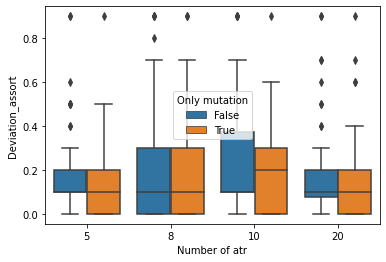

In [9]:
sns.boxplot(x='Number of atr', y='Deviation_assort', hue='Only mutation', data=final_df)

<AxesSubplot: xlabel='Number of atr', ylabel='Corr distance'>

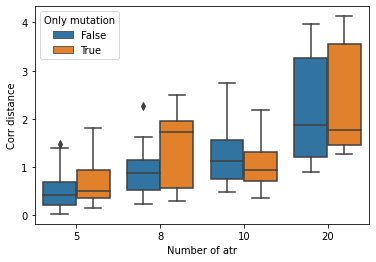

In [10]:
sns.boxplot(x='Number of atr', y='Corr distance', hue='Only mutation', data=final_df)

In [11]:
from golem.core.optimisers.genetic.operators.inheritance import GeneticSchemeTypesEnum
from golem.core.optimisers.adaptive.operator_agent import MutationAgentTypeEnum
from golem.visualisation.opt_history.multiple_fitness_line import MultipleFitnessLines
number_of_atr = [5, 8, 10, 20]
p_edge = [0.05]
target_assort = [0.2, 0.9]
corr = ['low', 'high']
mutation_types = [MutationAgentTypeEnum.default]
schemes = [GeneticSchemeTypesEnum.steady_state]
for mut in mutation_types:
    for schem in schemes:
        for n in number_of_atr:
            for cor in corr:
                for target in target_assort:
                    history1 = []
                    history2 = []
                    for _ in range(5):
                        file1 = open('examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(schem)+' '+str(mut) + ' exp3_history.json')
                        dict1 = json.load(file1)
                        history1.append(dict1)
                        file2 = open('examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(schem)+' '+str(mut) + ' exp4_history.json')
                        dict2 = json.load(file2)
                        history2.append(dict2)
                        fitn = MultipleFitnessLines.from_histories({'Mutations+Crossovers':history1, 'Only Mutations':history2})
                        fitn.visualize(metric_id=0, dpi=1000, save_path='examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(schem)+' '+str(mut)+' compare_crossover_use_fig1.png')

ModuleNotFoundError: No module named 'golem.visualisation.opt_history.multiple_fitness_line'